In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset from the CSV file
df = pd.read_csv('Boston.csv')
# Remove the unnamed index column if present
df = df.drop(columns=['Unnamed: 0']) if 'Unnamed: 0' in df.columns else df

Dataset Shape: (506, 14)

Basic Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.45553

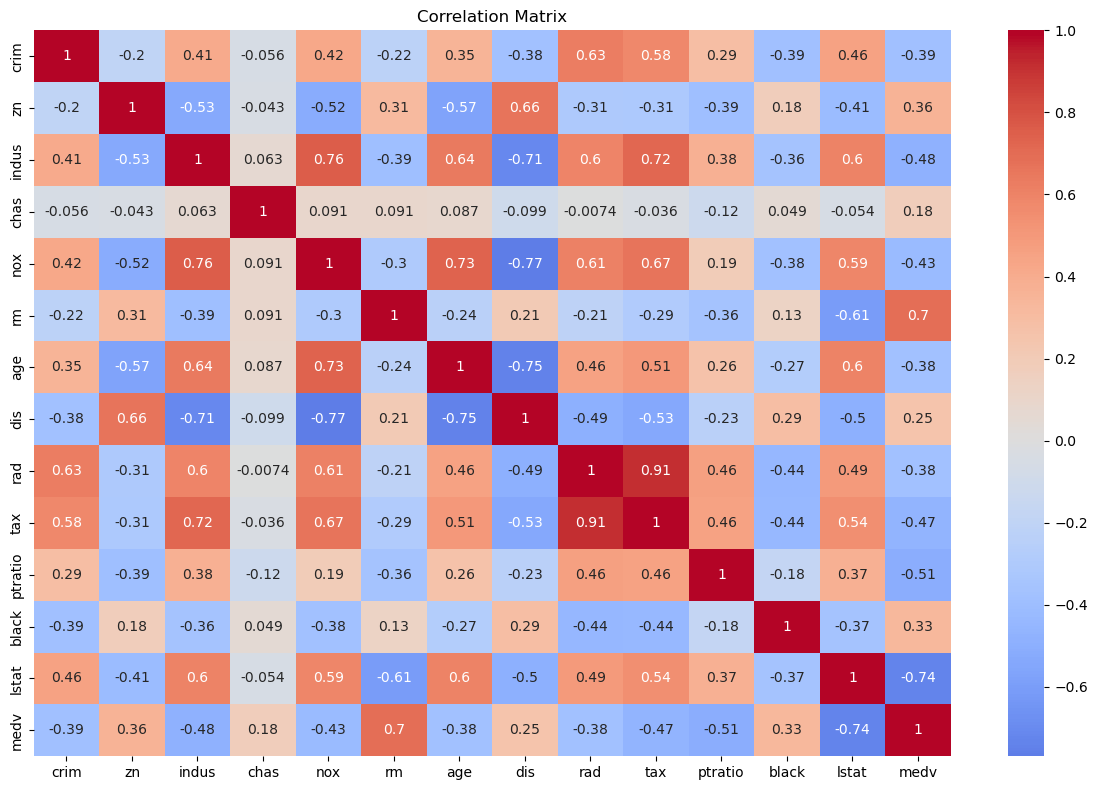

In [6]:
# Step 2: Exploratory Data Analysis
# Display basic statistics
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe())

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [8]:
# Step 3: Feature Selection
# Get correlations with target variable (medv)
correlations = abs(correlation_matrix['medv']).sort_values(ascending=False)
print("Correlations with MEDV:")
print(correlations)

# Select top 5 features
top_features = correlations[1:6].index.tolist()
print("\nTop 5 features:", top_features)

Correlations with MEDV:
medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

Top 5 features: ['lstat', 'rm', 'ptratio', 'indus', 'tax']


In [20]:
# Step 4: Data Preprocessing
# Prepare X (features) and y (target)
X = df[top_features]
y = df['medv']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Step 5: Model Training and Evaluation
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate R-squared score
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training R² Score:", train_score)
print("Testing R² Score:", test_score)

Training R² Score: 0.6871528221051747
Testing R² Score: 0.649913595653992


In [24]:
# Step 6: Cross-Validation
# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.73037232 0.52031768 0.67917993 0.75247857 0.5813702 ]
Mean CV Score: 0.6527437391786564
Standard Deviation: 0.0886599680391183


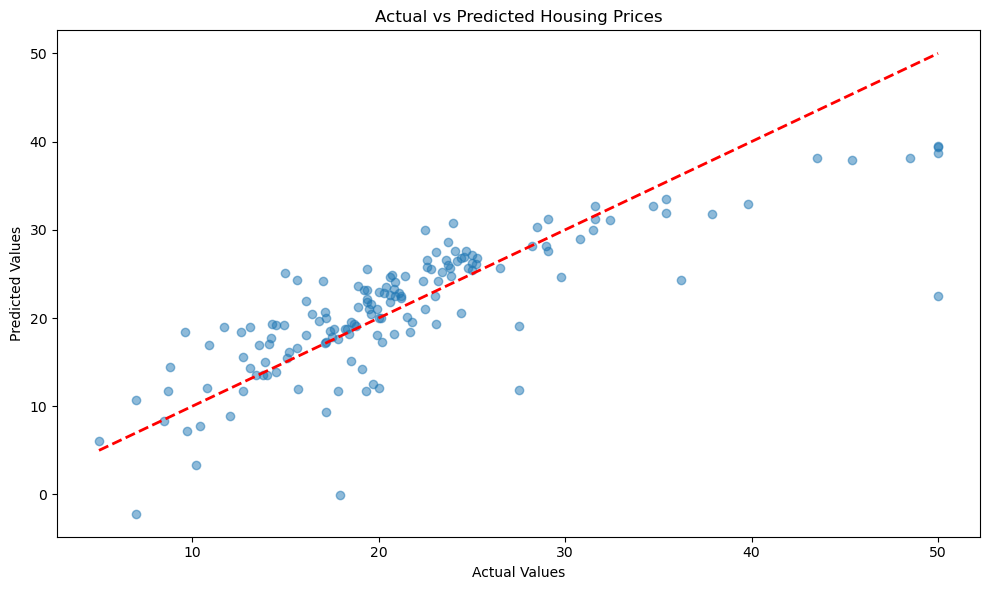

In [26]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.show()

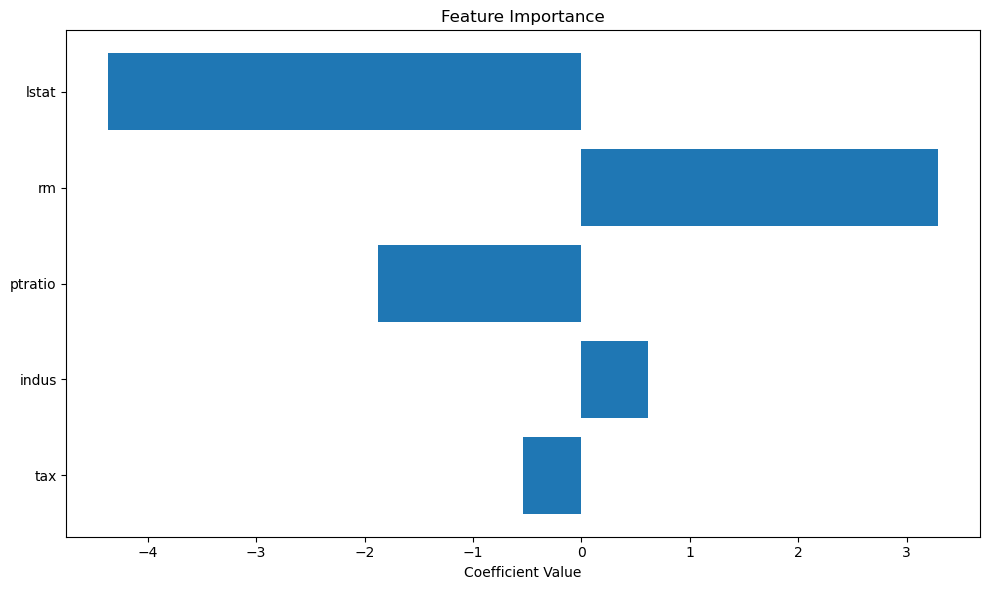

In [28]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()